In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import tensorly
import matplotlib.ticker as ticker
import tensorsketch
from tensorsketch.tensor_approx import TensorApprox
import warnings
warnings.filterwarnings('ignore')
from plot_util import *

'''
The dataset can be downloaded from:
PSL(sea level pressure): https://www.earthsystemgrid.org/dataset/ucar.cgd.ccsm4.CESM_CAM5_BGC_LE.atm.proc.monthly_ave.PSL/file.html
BURDENDUST(Dust aerosol burden): https://www.earthsystemgrid.org/dataset/ucar.cgd.ccsm4.CESM_CAM5_BGC_LE.atm.proc.monthly_ave.BURDENDUST.html
CLOUD(cloud fraction): https://www.earthsystemgrid.org/dataset/ucar.cgd.ccsm4.CESM_CAM5_BGC_LE.atm.proc.monthly_ave.CLOUD/file.html
AODABS(Aerosol absorption optical depth 550 nm): https://www.earthsystemgrid.org/dataset/ucar.cgd.ccsm4.CESM_CAM5_BGC_LE.atm.proc.monthly_ave.AODABS/file.html
ABSORB(Aerosol absorption): https://www.earthsystemgrid.org/dataset/ucar.cgd.ccsm4.CESM_CAM5_BGC_LE.atm.proc.monthly_ave.ABSORB/file.html
SRFRAD(Net radiative flux at surface): https://www.earthsystemgrid.org/dataset/ucar.cgd.ccsm4.CESM_CAM5_BGC_LE.atm.proc.monthly_ave.SRFRAD/file.html
'''
#CLOUD = nc.Dataset("data/b.e11.BRCP85C5CNBDRD.f09_g16.013.cam.h0.CLOUD.208101-210012.nc").variables['CLOUD'][:]
AODABS = nc.Dataset("data/b.e11.B1850C5CN.f09_g16.005.cam.h0.AODABS.040001-049912.nc").variables['AODABS'][:] 
AODABS = AODABS.filled(AODABS.mean())
ABSORB = nc.Dataset("data/b.e11.BRCP85C5CNBDRD.f09_g16.023.cam.h0.ABSORB.208101-210012.nc").variables['ABSORB'][:]
ABSORB = ABSORB.filled(ABSORB.mean())
SRFRAD = nc.Dataset("data/b.e11.B1850C5CN.f09_g16.005.cam.h0.SRFRAD.040001-049912.nc").variables['SRFRAD'][:]
BURDENDUST = nc.Dataset("data/b.e11.B1850C5CN.f09_g16.005.cam.h0.BURDENDUST.040001-049912.nc").variables['BURDENDUST'][:] 
#PSL = nc.Dataset("data/b.e11.B1850C5CN.f09_g16.005.cam.h0.PSL.200001-209912.nc").variables['PSL'][:]

def simrun_name(name, inv_factor,rm_typ): 
    ''' 
    Create an file name for a simulation run
    '''
    return "data/"+name+"_frk"+str(inv_factor)+"_"+rm_typ+".pickle"
def simplot_name(name, inv_factor): 
    return "plots/"+name+"_frk"+str(inv_factor)+".pdf" 
    '''
    Create an file name for simulation result plots 
    ''' 

Using numpy backend.
Using numpy backend.


In [7]:
'''
def multisimplotlog_name(name, inv_factor): 
    return "plots/aistats/"+"multi_"+name+"_frk"+str(inv_factor)+"log.pdf" 
def multiplot_realdata_frklog(rm_typs , data, inv_factor, name, fontsize = 18): 
    ranks = (np.array(data.shape)/inv_factor).astype(int)    
    kratio = np.arange(2/inv_factor,2/5, (2/5 -1/inv_factor)/10)
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)    
    plt.figure(figsize=(6,5))
    sim_list = []
    ymaxs = [] 
    
    for i,rm_typ in enumerate(rm_typs):        
        sim_list.append(pickle.load(open(simrun_name(name, inv_factor, rm_typ), "rb" )))
        hooi_result = [np.log(sim_list[i][0][j]) for j in range(len(sim_list[i][0]))]
        two_pass_result = [np.log(sim_list[i][1][j]) for j in range(len(sim_list[i][0]))]
        one_pass_result = [np.log(sim_list[i][2][j]) for j in range(len(sim_list[i][0]))]
        plt.plot(kratio,two_pass_result, label = find_rm_label(rm_typ)+' 2-Pass', markersize = 10, marker = MARKER_LIST[2*i],markeredgewidth=1, markerfacecolor='None') 
        plt.plot(kratio,one_pass_result, label = find_rm_label(rm_typ)+' 1-Pass', markersize = 10, marker = MARKER_LIST[2*i+1],markeredgewidth=1, markerfacecolor='None') 
        if i == len(rm_typs)-1: 
            plt.plot(kratio,hooi_result, label = 'HOOI', markersize = 10, marker = MARKER_LIST[2*i+2],markeredgewidth=1, markerfacecolor ='None')
        alldata = np.concatenate([two_pass_result,one_pass_result])
        ymaxs.append(max(alldata)) 
    ymin = 0
    ymax = max(ymaxs)
    if inv_factor == 15: 
        plt.legend(loc = 'best')
    plt.title("r/I = %s"%round(1/inv_factor,3))
    plt.xlabel('Compression Factor: $\delta_1$ = k/I')
    plt.ylabel('log(Relative Error)')
    plt.minorticks_off()
    def round_to_n(x,n): 
        if x == 0: 
            return 0
        else: 
            return round(x,-int(np.floor(np.log10(abs(x))))+n-1) 
    ticks = [round_to_n(i,3) for i in np.arange(ymin, ymax+(ymax-ymin)/5,(ymax-ymin)/5)] 
    #plt.yticks(ticks)
    plt.axes().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e')) 
    plt.axes().title.set_fontsize(fontsize)
    plt.axes().xaxis.label.set_fontsize(fontsize)
    plt.axes().yaxis.label.set_fontsize(fontsize)
    plt.rc('legend',fontsize = fontsize)
    plt.rc('xtick', labelsize = fontsize) 
    plt.rc('ytick', labelsize = fontsize) 
    plt.tight_layout()
    plt.savefig(multisimplotlog_name(name,inv_factor))
    plt.show()
'''

'\ndef multisimplotlog_name(name, inv_factor): \n    return "plots/aistats/"+"multi_"+name+"_frk"+str(inv_factor)+"log.pdf" \ndef multiplot_realdata_frklog(rm_typs , data, inv_factor, name, fontsize = 18): \n    ranks = (np.array(data.shape)/inv_factor).astype(int)    \n    kratio = np.arange(2/inv_factor,2/5, (2/5 -1/inv_factor)/10)\n    plt.rc(\'font\', **{\'family\': \'serif\', \'serif\': [\'Computer Modern\']})\n    plt.rc(\'text\', usetex=True)    \n    plt.figure(figsize=(6,5))\n    sim_list = []\n    ymaxs = [] \n    \n    for i,rm_typ in enumerate(rm_typs):        \n        sim_list.append(pickle.load(open(simrun_name(name, inv_factor, rm_typ), "rb" )))\n        hooi_result = [np.log(sim_list[i][0][j]) for j in range(len(sim_list[i][0]))]\n        two_pass_result = [np.log(sim_list[i][1][j]) for j in range(len(sim_list[i][0]))]\n        one_pass_result = [np.log(sim_list[i][2][j]) for j in range(len(sim_list[i][0]))]\n        plt.plot(kratio,two_pass_result, label = find_rm_lab

In [9]:
def multisimplot_name(name, inv_factor): 
    return "plots/aistats/"+"multi_"+name+"_frk"+str(inv_factor)+".pdf" 
def multiplot_realdata_frk(rm_typs , data, inv_factor, name, fontsize = 18): 
    ranks = (np.array(data.shape)/inv_factor).astype(int)    
    kratio = np.arange(2/inv_factor,2/5, (2/5 -1/inv_factor)/10)    
    plt.figure(figsize=(6,5))
    set_font(fontsize)
    sim_list = []
    
    for i,rm_typ in enumerate(rm_typs):        
        sim_list.append(pickle.load(open(simrun_name(name, inv_factor, rm_typ), "rb" )))
        hooi_result = np.array([(sim_list[i][0][j]) for j in range(len(sim_list[i][0]))])
        two_pass_result_diff = np.array([(sim_list[i][1][j]) for j in range(len(sim_list[i][0]))]) - hooi_result
        one_pass_result_diff = np.array([(sim_list[i][2][j]) for j in range(len(sim_list[i][0]))]) - hooi_result
        plt.plot(kratio,two_pass_result_diff, label = find_rm_label(rm_typ)+' 2-Pass', markersize = 10, marker = marker('2pass', 'gprod'), color = marker_color('2pass', 'gprod') ,markeredgewidth=1, markerfacecolor='None') 
        plt.plot(kratio,one_pass_result_diff, label = find_rm_label(rm_typ)+' 1-Pass', markersize = 10, marker = marker('1pass', 'gprod'), color = marker_color('1pass', 'gprod') ,markeredgewidth=1, markerfacecolor='None') 
    plt.yscale('log')
    if inv_factor == 15: 
        plt.legend(loc = 'best')
    plt.title("r/I = %s"%round(1/inv_factor,3))
    plt.xlabel('k/I')
    plt.ylabel('Regret')
    plt.savefig(multisimplot_name(name,inv_factor),bbox_inches = "tight",pad_inches=0)
    plt.show()

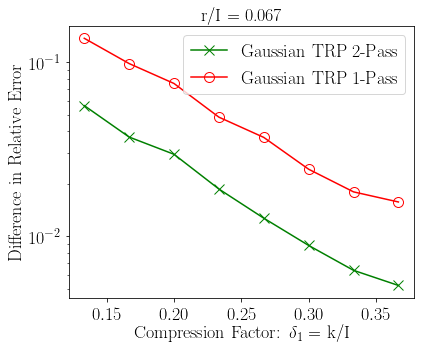

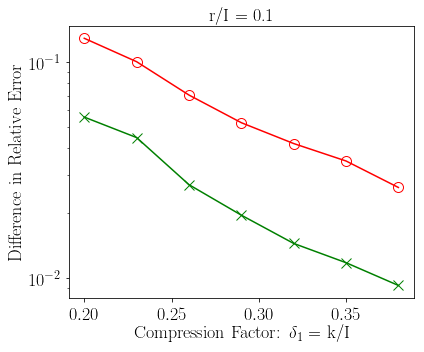

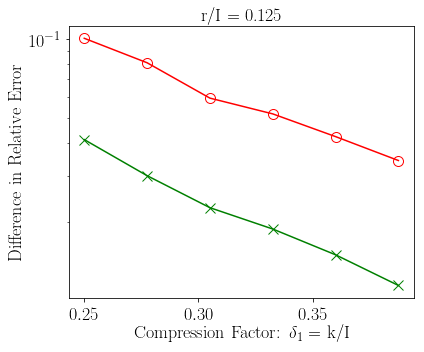

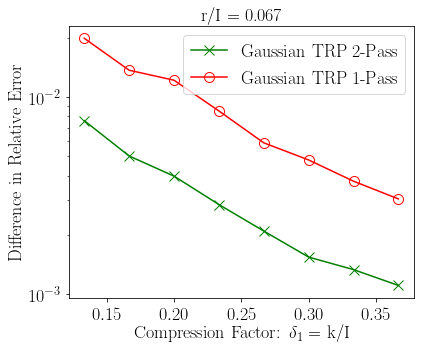

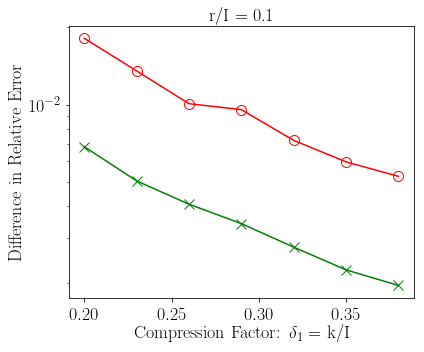

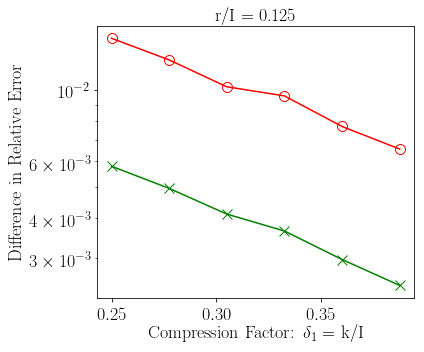

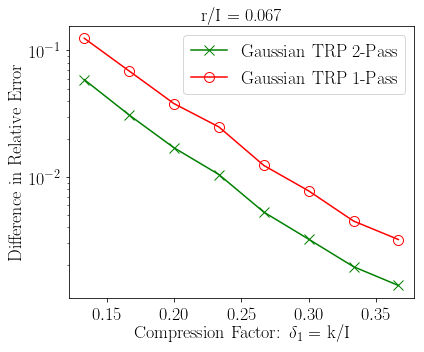

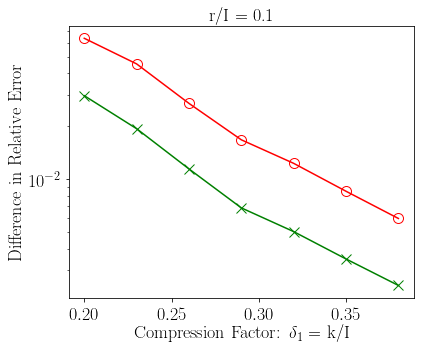

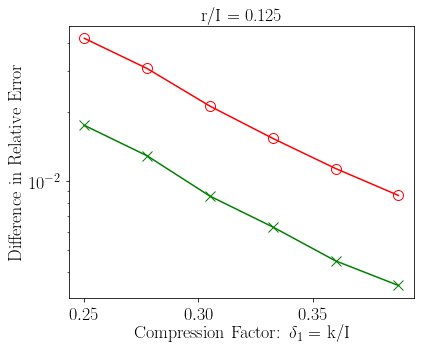

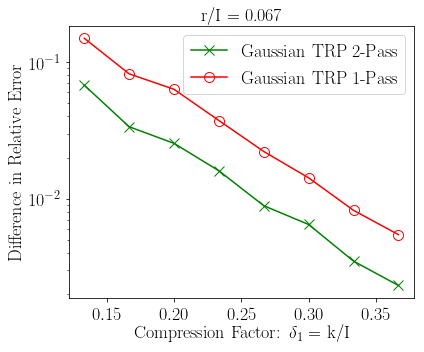

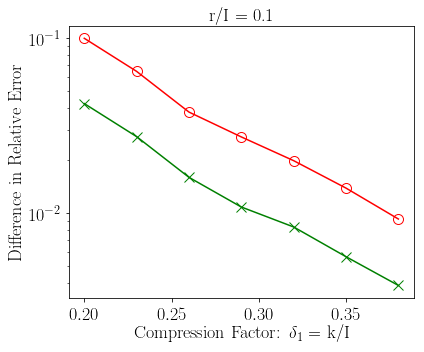

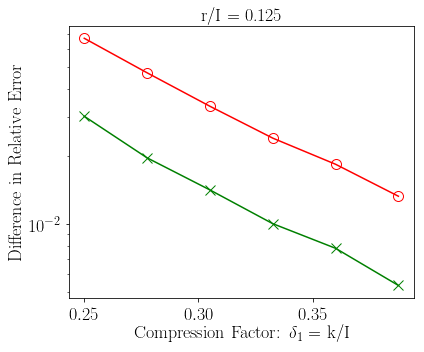

In [11]:
multiplot_realdata_frk(['gprod'], ABSORB,15,"ABSORB")
multiplot_realdata_frk(['gprod'], ABSORB,10,"ABSORB")
multiplot_realdata_frk(['gprod'], ABSORB,8,"ABSORB")
multiplot_realdata_frk(['gprod'], SRFRAD,15,"SRFRAD")
multiplot_realdata_frk(['gprod'], SRFRAD,10,"SRFRAD")
multiplot_realdata_frk(['gprod'], SRFRAD,8,"SRFRAD")
multiplot_realdata_frk(['gprod'], BURDENDUST,15,"BURDENDUST")
multiplot_realdata_frk(['gprod'], BURDENDUST,10,"BURDENDUST")
multiplot_realdata_frk(['gprod'], BURDENDUST,8,"BURDENDUST")
multiplot_realdata_frk(['gprod'], AODABS,15,"AODABS")
multiplot_realdata_frk(['gprod'], AODABS,10,"AODABS")
multiplot_realdata_frk(['gprod'], AODABS,8,"AODABS")

In [21]:
def multiplot_realdata_fk(rm_typs, data, name,title, random_seed = 1,fontsize = 18): 
    X = data 
    kratio = 1/5
    r0ratio = 1/20
    rratios = np.arange((r0ratio),(1/5),(1/100))
    dim = np.array(X.shape)
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)    
    plt.figure(figsize=(6,5))  
    ymins = [] 
    ymaxs = []
    sim_list = [] 
    for i,rm_typ in enumerate(rm_typs):
        sim_list.append(pickle.load(open("data/"+name+"_"+rm_typ+"_fk.pickle","rb")))      
        two_pass_result = [np.log(sim_list[i][0][j]/sim_list[i][2][j]) for j in range(len(sim_list[i][2]))]
        one_pass_result = [np.log(sim_list[i][1][j]/sim_list[i][2][j]) for j in range(len(sim_list[i][2]))]    
        plt.plot(rratios,one_pass_result, label = find_rm_label(rm_typ), markersize = 10, marker = MARKER_LIST[i],markeredgewidth=1, markerfacecolor='None') 
        alldata = np.concatenate([one_pass_result,two_pass_result])
        ymins.append(min(alldata)) 
        ymaxs.append(max(alldata)) 
    plt.plot(r0ratio, 0, marker = "D", markersize = 10)
    plt.legend(loc = 'best')
    plt.title(title)
    plt.xlabel('$r/I$')
    plt.ylabel('log(Relative Error)')
    plt.minorticks_off()
    ymin = min(ymins)
    ymax = max(ymaxs)
    def round_to_n(x,n): 
        if x == 0: 
            return 0
        else: 
            return round(x,-int(np.floor(np.log10(abs(x))))+n-1) 
    ticks = [round_to_n(i,3) for i in np.arange(ymin, ymax+(ymax-ymin)/5,(ymax-ymin)/5)] 
    plt.yticks(ticks)
    plt.axes().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2e')) 
    plt.axes().xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.axes().title.set_fontsize(fontsize)
    plt.axes().xaxis.label.set_fontsize(fontsize)
    plt.axes().yaxis.label.set_fontsize(fontsize)
    plt.rc('legend', fontsize = fontsize)
    plt.rc('xtick', labelsize = fontsize) 
    plt.rc('ytick', labelsize = fontsize) 
    plt.axhline(0, color='black',linewidth = 1)
    plt.tight_layout()
    plt.savefig("plots/aistats/"+"multi_"+name+"_fk.pdf",bbox_inches = "tight",pad_inches=0)
    plt.show()
    

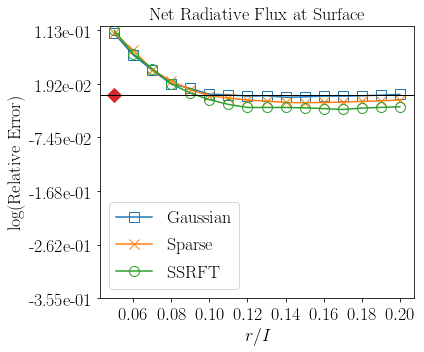

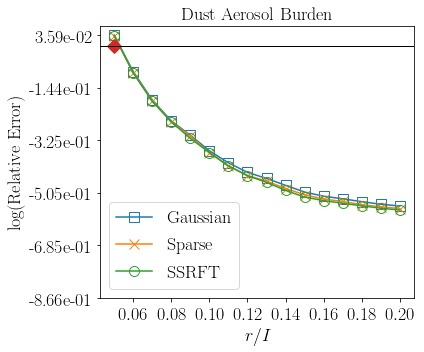

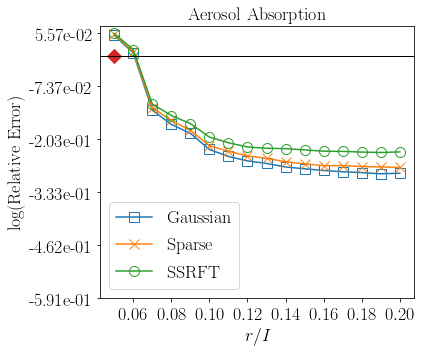

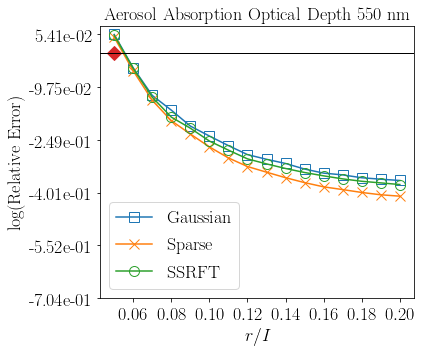

In [22]:
multiplot_realdata_fk(['g','sp0','ssrft'], SRFRAD,"SRFRAD", "Net Radiative Flux at Surface")
multiplot_realdata_fk(['g','sp0','ssrft'], BURDENDUST,"BURDENDUST", "Dust Aerosol Burden")
multiplot_realdata_fk(['g','sp0','ssrft'], ABSORB,"ABSORB", "Aerosol Absorption")
multiplot_realdata_fk(['g','sp0','ssrft'], AODABS,"AODABS", "Aerosol Absorption Optical Depth 550 nm")

In [2]:
SRFRAD = nc.Dataset("data/b.e11.B1850C5CN.f09_g16.005.cam.h0.SRFRAD.040001-049912.nc").variables['SRFRAD'][:]


In [4]:
SRFRAD.shape

(1200, 192, 288)

In [7]:
inv_factor = 15

In [17]:
inv_factor = 15;AODABS = nc.Dataset("data/b.e11.B1850C5CN.f09_g16.005.cam.h0.AODABS.040001-049912.nc").variables['AODABS'][:] 
AODABS = AODABS.filled(AODABS.mean())

In [18]:
ranks = (np.array(SRFRAD.shape)/inv_factor).astype(int)

In [19]:
ks = (np.array(SRFRAD.shape)/inv_factor*2).astype(int)

In [20]:
ss = 2*ks +1

In [22]:
tapprox = tensorsketch.tensor_approx.TensorApprox(AODABS, ranks = ranks, ks = 2*ranks, \
            ss = 4*ranks, random_seed = 1, rm_typ = 'g', store_phis = True)
    
_, _, _, hooi_rerr, _ = tapprox.tensor_approx('hooi')
print(hooi_rerr)

_, _, _, two_pass_rerr, _ = tapprox.tensor_approx('twopass')
print(two_pass_rerr)

_, _, _, one_pass_rerr, _ = tapprox.tensor_approx('onepass')
print(one_pass_rerr)

Using numpy backend.


0.2302686


Using numpy backend.
Using numpy backend.


0.2948117836438123


Using numpy backend.
Using numpy backend.


0.3739668789234745


In [25]:
pickle.load(open(simrun_name('AODABS', '15', "g"), "rb" ))

[[0.2302638739347458,
  0.2302638739347458,
  0.2302638739347458,
  0.2302638739347458,
  0.2302638739347458,
  0.2302638739347458,
  0.2302638739347458,
  0.2302638739347458],
 [0.29083586149112334,
  0.26025984563023496,
  0.24972558030554823,
  0.24225839936279223,
  0.23765056516686217,
  0.234687164772112,
  0.23298044547431063,
  0.23220632829836999],
 [0.3847105801426933,
  0.306901693406575,
  0.2776816849385155,
  0.2605088432032239,
  0.24997713756120638,
  0.24092267519677618,
  0.23760553177574395,
  0.23544090915909696]]

In [15]:
(2/15,2/5, (2/5 -1/15)/10)

(0.13333333333333333, 0.4, 0.03333333333333334)

In [16]:
2/15

0.13333333333333333